In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import scipy.optimize
import h5py

from astropy.table import Table
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)
plt.style.use('ggplot');
plt.tight_layout();

<Figure size 2000x1500 with 0 Axes>

### Problem 1

In [2]:
dsize = int(1e6)

In [3]:
bkgd = stats.norm.rvs(size= dsize,  scale = 2.6)

In [4]:
signal = np.random.rand(dsize)*20

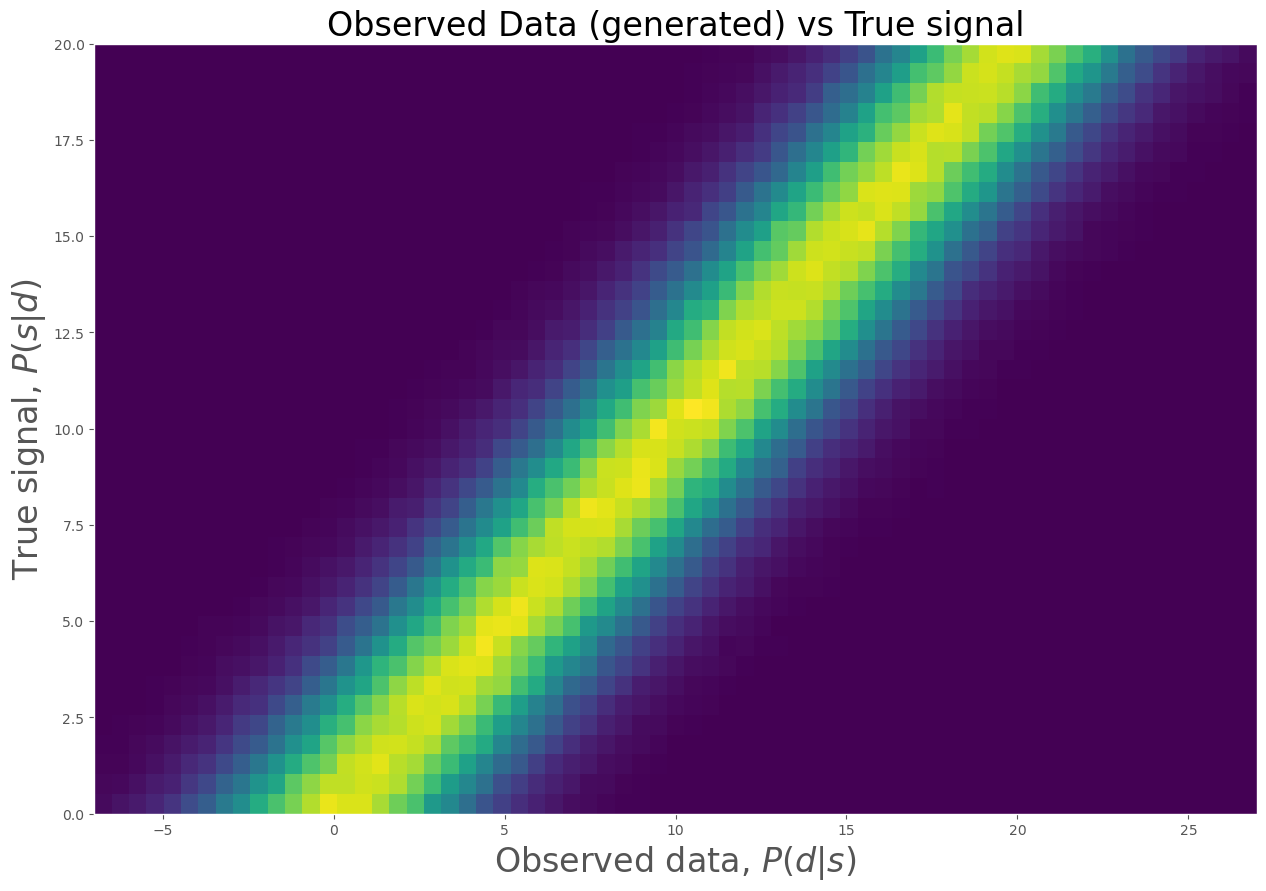

In [5]:
data = bkgd + signal

plt.rcParams["figure.figsize"] = (15,10)
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T,shading='auto')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24);
plt.title('Observed Data (generated) vs True signal', fontsize = 24);

#### 1b)  
The slice is taken at a true injected data of 3.2

In [6]:
data = bkgd + signal
true_data = 3.2
slice_1 = []
for i, val in enumerate(signal):
    if (val < (true_data + 0.1)) and (val > (true_data - 0.1)):
        slice_1.append((data)[i])
len(slice_1)   

10072

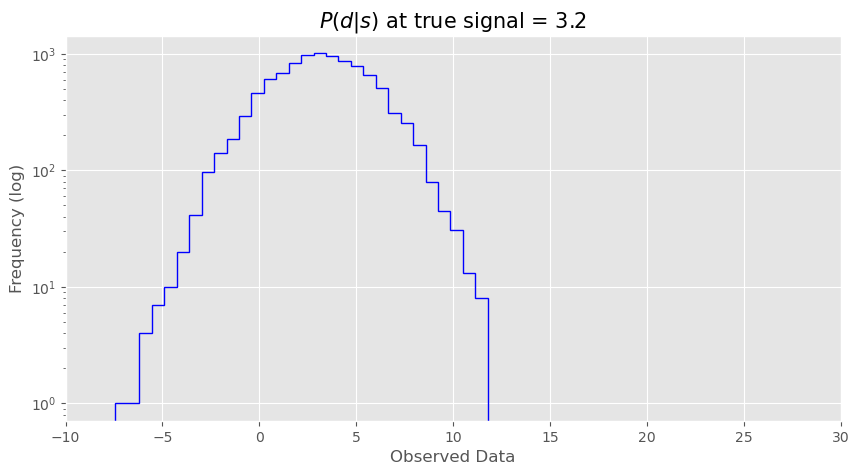

In [7]:
plt.rcParams["figure.figsize"] = (10,5)

fig, ax = plt.subplots(1, 1)
ax.hist(slice_1, bins = 30,  histtype='step',color = "blue", linewidth = 1)
ax.set_xlim(-10, 30)
ax.set_yscale("log");
ax.set_xlabel("Observed Data")
ax.set_ylabel("Frequency (log)")
ax.set_title("$P(d | s)$ at true signal = {}".format(true_data), fontsize = 15);

The graph answer the statistical questions of:  
If we have a signal-free background, and we injected a fake signal of 3.2,  
what should the observed data distribution looks like.  
In this case, the distribution is a Gaussian with mean around 3.2

#### 1b)  
The slice is taken at a observed data of 10.3

In [8]:
data = bkgd + signal
obs_data = 10.3
slice_2 = []
for i, val in enumerate(data):
    if (val < (obs_data + 0.1)) and (val > (obs_data - 0.1)):
        slice_2.append(signal[i])
len(slice_2)   

10090

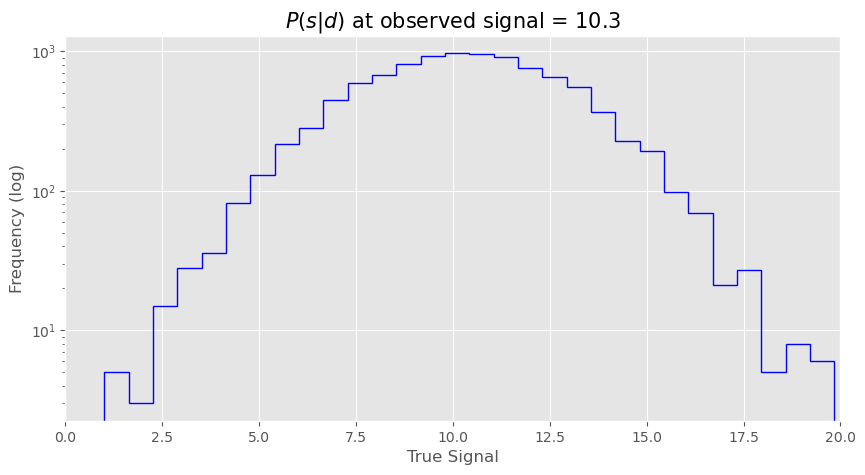

In [9]:
plt.rcParams["figure.figsize"] = (10,5)

fig, ax = plt.subplots(1, 1)
ax.hist(slice_2, bins = 30,  histtype='step',color = "blue", linewidth = 1)
ax.set_xlim(0, 20)
ax.set_yscale("log");
ax.set_xlabel("True Signal")
ax.set_ylabel("Frequency (log)")
ax.set_title("$P(s | d)$ at observed signal = {}".format(obs_data), fontsize = 15);

The graph answer the statistical questions of:  
If I measure the data value to be 10.3, then what is the range of true signals and what are their probabilities.  
In this case, the distribution is a Gaussian with mean around 10.3

### Problem 2  
In this case, $\sigma = 2.6$, mean = 7.2

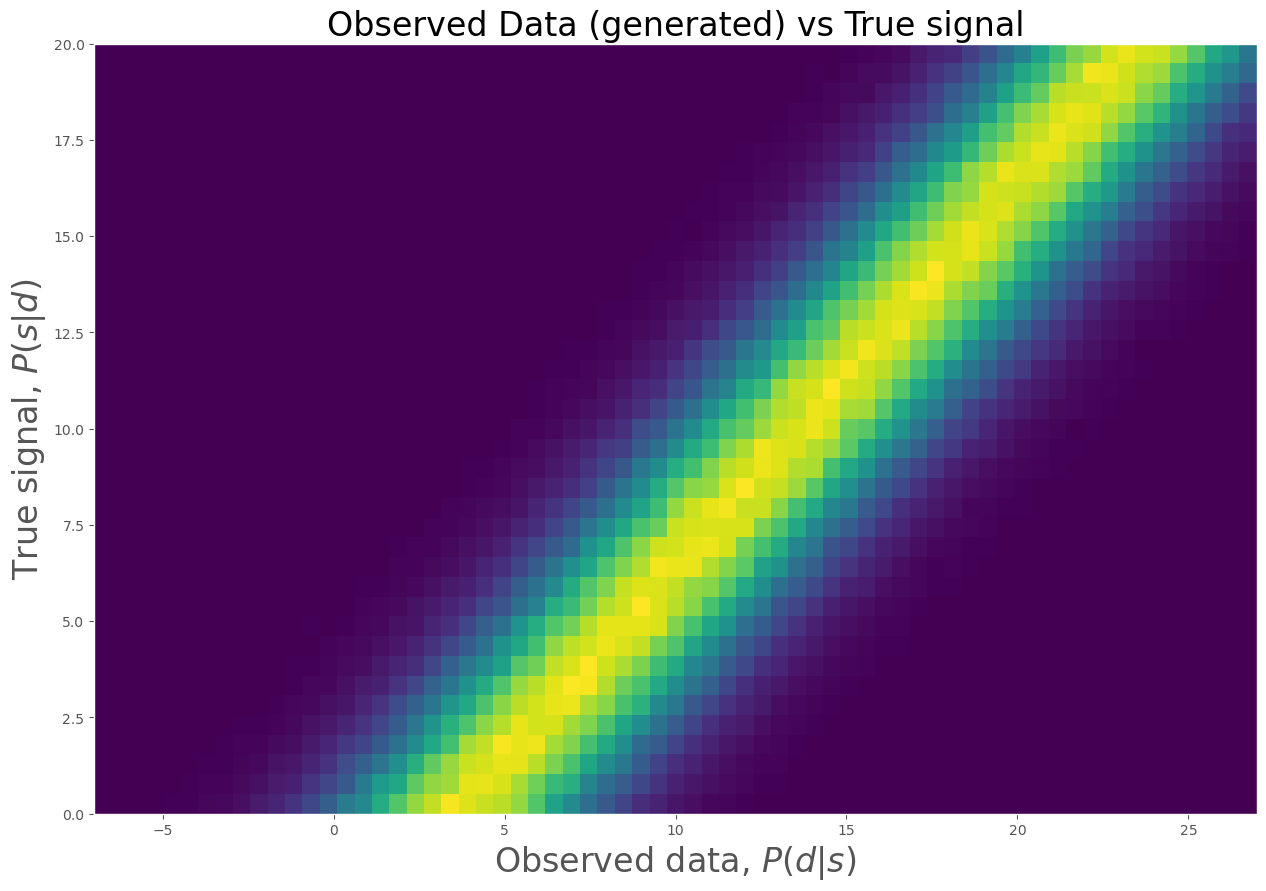

In [10]:
bkgd_new = stats.norm.rvs(size= dsize, loc = 3.6, scale = 2.6)
signal_new = np.random.rand(dsize)*20
data_new = bkgd_new + signal_new

plt.rcParams["figure.figsize"] = (15,10)
signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data_new,signal_new, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T,shading='auto')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24);
plt.title('Observed Data (generated) vs True signal', fontsize = 24);

In [11]:
data_new = bkgd_new + signal_new

true_data = 15
slice_3 = []
for i, val in enumerate(signal_new):
    if (val < (true_data + 0.1)) and (val > (true_data - 0.1)):
        slice_3.append((data_new)[i])
obs_data = 15        
slice_4 = []
for i, val in enumerate(data_new):
    if (val < (obs_data + 0.1)) and (val > (obs_data - 0.1)):
        slice_4.append(signal_new[i])

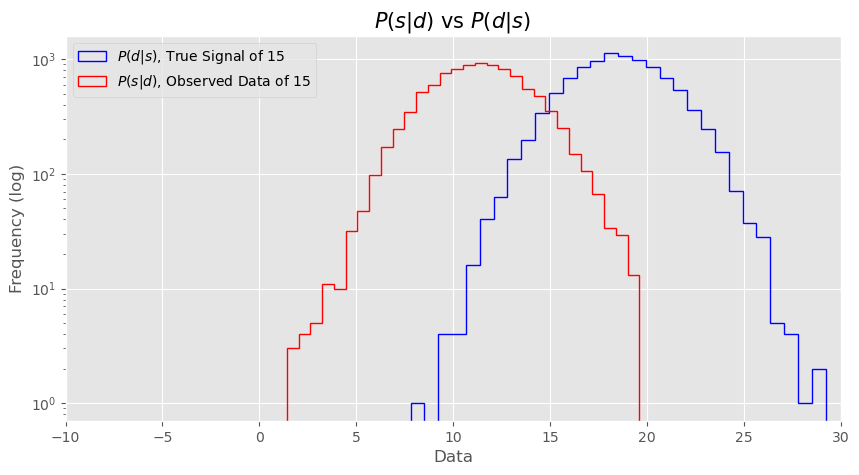

In [12]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots(1, 1)
ax.hist(slice_3, bins = 30,  histtype='step',color = "blue", linewidth = 1, label = "$P(d | s)$, True Signal of 15")
ax.hist(slice_4, bins = 30,  histtype='step',color = "red", linewidth = 1,label = "$P(s |d )$, Observed Data of 15")

ax.set_xlim(-10, 30)
ax.set_yscale("log");
ax.set_xlabel("Data")
ax.set_ylabel("Frequency (log)")
ax.set_title("$P(s | d)$ vs $P(d | s)$ ", fontsize = 15);
ax.legend();

In the first case, $P(signal)$ has a mean of 10 (as a uniform distribution from 0 to 20)  
and $ P (bkgd)$ has a mean of 0,  as  $ data = signal + bkgd$,    
then $P(data)$ also has a mean of 10.  
From Bayes' Theorem:   
$$
P(signal|data) = \frac{P(data|signal) P (signal)}{P(data)}
$$
Then, As $P(signal)$ and $P(data)$ has the same mean,  
$P(data|signal)$ and $P(signal|data)$ must also have the same mean.

However, in the second case, $ P(bkgd)$ has a none zero mean of 7.2,  
so $P(signal)$  has a mean of 17.2 while $P(signal)$ still has a mean of 10  
$P(data|signal)$ and $P(signal|data)$ no longer have the same mean.
